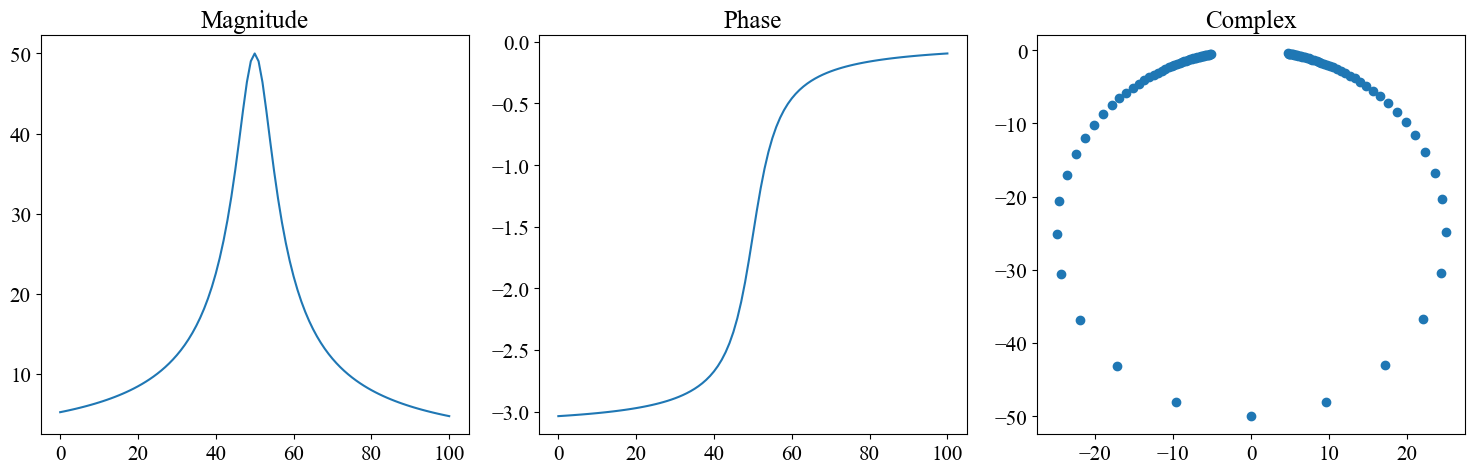

In [1]:
import numpy as np
from matplotlib import pyplot as plt
import sys
sys.path.append('..')
from reflectarray import element
from reflectarray.reflectarray import Reflectarray
from reflectarray.feed import Feed
from reflectarray.feed import PyramidalHorn
from reflectarray.system import System

C = 3E8
f = 10E9
lam = C/f

patch1 = element.Patch(f=f, Q=50, lattice_vectors=np.array([[1, 0, 0], [0, 1, 0]]))
patch1.plot()

In [2]:
L = 10*lam
delta_x = lam/2
delta_y = lam/2
x = np.arange(-L/2, L/2+delta_x, delta_x)
y = np.arange(-L/2, L/2+delta_y, delta_y)

%matplotlib qt
fig = plt.figure(figsize=(7,7))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122, projection='3d')

array = Reflectarray(patch1, x=x, y=y)
array.plot(ax=ax1, show_lattice_vectors=True)

array.deform(axis='x', R_cylinder=10*lam)
array.plot(ax=ax2, show_normals=True, show_lattice_vectors=True)

In [3]:
Lx_feed = 2*lam
Ly_feed = lam
delta_x_feed = lam/10
delta_y_feed = lam/10
x_feed = np.arange(-Lx_feed/2, Lx_feed/2+delta_x_feed, delta_x_feed)
y_feed = np.arange(-Ly_feed/2, Ly_feed/2+delta_y_feed, delta_y_feed)
X_feed, Y_feed = np.meshgrid(x_feed, y_feed, indexing='ij')
Z_feed = np.zeros_like(X_feed)
r_feed = np.stack((X_feed.flatten(), Y_feed.flatten(), Z_feed.flatten()), axis=-1)

J_e = np.tile(np.array([[1, 0, 0]]).astype(np.complex128), (r_feed.shape[0], 1))
J_m = np.tile(np.array([[0, 1, 0]]).astype(np.complex128), (r_feed.shape[0], 1))

feed1 = Feed(f=f, r=r_feed, rotation=(0, 0, 90), J_e=J_e, J_m=J_m)

feed1.plot(quiver=True, plot_type='3D', plot_value='J_e')

In [7]:
horn = PyramidalHorn(f=f, E0=1, rotation=(20, 0, 90), r_offset=(0, 0, 5*lam))

horn.plot(quiver=True, plot_type='3D', plot_value='J_m')

In [5]:
system1 = System(array, horn)
system1.plot()